<h1><center>Problem 1</center></h1>

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:
#1a - create data-frame called weather.

weather = pd.read_csv('weather.csv')
weather.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [4]:
#Select data up to October 31, 2011. After that, remove any observation with missing values.
filter_weather = weather.loc[(weather['hpwren_timestamp'] < '2011-11-01')]
filter_weather = filter_weather.dropna()
filter_weather.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6


In [7]:
#1b - air pressure, air temp, avg wind direction, avg wind speed, max wind direction, max wind speed, and relative humidity. 

filter_weather = filter_weather[['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 'max_wind_speed', 'relative_humidity']]
filter_weather.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
1,912.3,63.86,161.0,0.8,215.0,1.5,39.9
2,912.3,64.22,77.0,0.7,143.0,1.2,43.0
3,912.3,64.40,89.0,1.2,112.0,1.6,49.5
4,912.3,64.40,185.0,0.4,260.0,1.0,58.8
5,912.3,63.50,76.0,2.5,92.0,3.0,62.6


In [8]:
#Transform all the variables of interest to 0-1 scale.
scaler = MinMaxScaler()
filter_weather[['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 'max_wind_speed',
                'relative_humidity']] = scaler.fit_transform(filter_weather)

filter_weather.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
1,0.16,0.403922,0.448468,0.034188,0.598886,0.054264,0.400000
2,0.16,0.411765,0.214485,0.029915,0.398329,0.042636,0.435429
3,0.16,0.415686,0.247911,0.051282,0.311978,0.058140,0.509714
4,0.16,0.415686,0.515320,0.017094,0.724234,0.034884,0.616000
5,0.16,0.396078,0.211699,0.106838,0.256267,0.112403,0.659429


In [9]:
#1c - Using the silhouette score, estimate the number of clusters for this dataset. Consider 2 to 20 clusters. 
#Make sure to use n init = 20 in the KMeans function from the sklearn.cluster library

#Empty list for score
sil_score = list()

#2 to 20 clusters
for i in range(2, 21):
    
    #Cluster data
    km_md = KMeans(n_clusters = i, n_init=20).fit(filter_weather[['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
                                                                  'max_wind_direction', 'max_wind_speed', 'relative_humidity']])
    km_labels = km_md.labels_
    
    #Silhouette score
    sil_score1 = silhouette_score(filter_weather[['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
                                             'max_wind_speed', 'relative_humidity']], km_labels)
    sil_score.append(sil_score1)

Text(0, 0.5, 'Score')

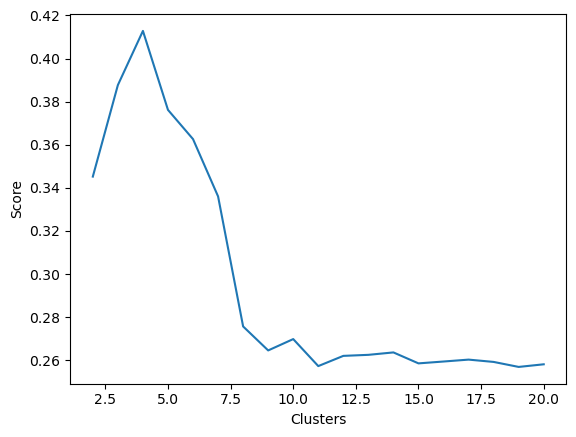

In [14]:
#Let's plot it so it is easier to see
plt.plot(range(2, 21), sil_score)
plt.xlabel('Clusters')
plt.ylabel('Score')

From the above, we see the highest score is at the peak of the graph around 4 clusters

In [15]:
#1d -  Using the KMeans function from the sklearn.cluster library, cluster the customers into the number of clusters estimated from part (c).

#From the above, we use 4 clusters
km_md_4 = KMeans(n_clusters=4, n_init=20).fit(filter_weather[['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
                                                              'max_wind_direction','max_wind_speed','relative_humidity']])

#Add cluster column
filter_weather['cluster']= km_md_4.labels_
filter_weather.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,cluster
1,0.16,0.403922,0.448468,0.034188,0.598886,0.054264,0.400000,3
2,0.16,0.411765,0.214485,0.029915,0.398329,0.042636,0.435429,0
3,0.16,0.415686,0.247911,0.051282,0.311978,0.058140,0.509714,0
4,0.16,0.415686,0.515320,0.017094,0.724234,0.034884,0.616000,2
5,0.16,0.396078,0.211699,0.106838,0.256267,0.112403,0.659429,0


In [16]:
#1e - Describe each of the clusters. Does the clustering results make sense? if not, suggest how would improve this analysis.

#Cluster 0
cluster_0 = filter_weather[filter_weather['cluster'] == 0]

#Cluster 1
cluster_1 = filter_weather[filter_weather['cluster'] == 1]

#Cluster 2
cluster_2 = filter_weather[filter_weather['cluster'] == 2]

#Cluster 3
cluster_3 = filter_weather[filter_weather['cluster'] == 3]

In [17]:
#Cluster 0
cluster_0.describe()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,cluster
count,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.0
mean,0.630032,0.557157,0.118806,0.092248,0.162400,0.097536,0.291621,0.0
std,0.153315,0.148688,0.077987,0.056616,0.084985,0.060033,0.151532,0.0
min,0.060000,0.015686,0.000000,0.004274,0.000000,0.000000,0.000000,0.0
25%,0.500000,0.450980,0.055710,0.051282,0.103064,0.054264,0.189714,0.0
50%,0.650000,0.564706,0.111421,0.076923,0.147632,0.081395,0.266286,0.0
75%,0.750000,0.658824,0.161560,0.119658,0.200557,0.124031,0.354286,0.0
max,1.000000,0.988235,0.367688,0.380342,0.690808,0.422481,0.854857,0.0


In [18]:
#Cluster 1
cluster_1.describe()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,cluster
count,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.0
mean,0.612109,0.551158,0.950851,0.064942,0.058051,0.078863,0.321809,1.0
std,0.142160,0.159895,0.056093,0.042965,0.062217,0.049370,0.162464,0.0
min,0.090000,0.019608,0.582173,0.000000,0.000000,0.000000,0.043429,1.0
25%,0.520000,0.458824,0.933148,0.029915,0.013928,0.042636,0.221714,1.0
50%,0.610000,0.568627,0.969359,0.055556,0.036212,0.069767,0.280000,1.0
75%,0.720000,0.674510,0.988858,0.089744,0.077994,0.104651,0.389714,1.0
max,1.000000,0.984314,1.000000,0.299145,0.392758,0.333333,0.973714,1.0


In [20]:
#Cluster 2
cluster_2.describe()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,cluster
count,16458.000000,16458.000000,16458.000000,16458.000000,16458.000000,16458.000000,16458.000000,16458.0
mean,0.501472,0.199489,0.536982,0.109046,0.566118,0.118386,0.882575,2.0
std,0.177031,0.116458,0.191731,0.081202,0.196935,0.086954,0.126857,0.0
min,0.000000,0.000000,0.000000,0.004274,0.000000,0.000000,0.486857,2.0
25%,0.400000,0.117647,0.479109,0.047009,0.512535,0.054264,0.765714,2.0
50%,0.500000,0.168627,0.545961,0.089744,0.579387,0.096899,0.961143,2.0
75%,0.620000,0.278431,0.629526,0.149573,0.665738,0.162791,0.989714,2.0
max,0.930000,0.513725,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [21]:
#Cluster 3
cluster_3.describe()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,cluster
count,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.0
mean,0.630127,0.598621,0.595388,0.092776,0.645222,0.100510,0.336377,3.0
std,0.156178,0.120879,0.148866,0.055847,0.152689,0.056898,0.150730,0.0
min,0.040000,0.156863,0.183844,0.000000,0.392758,0.000000,0.000000,3.0
25%,0.520000,0.509804,0.495822,0.047009,0.529248,0.054264,0.224000,3.0
50%,0.640000,0.592157,0.562674,0.085470,0.601671,0.093023,0.316571,3.0
75%,0.740000,0.690196,0.632312,0.128205,0.704735,0.135659,0.445714,3.0
max,1.000000,1.000000,0.994429,0.367521,1.000000,0.387597,0.700571,3.0


The results make sense, each cluster has something where the mean is much lower than the other clusters. For example, cluster 2 air pressure of around .5 is much lower of every other cluster having over .6<br>

Cluster 2 also has a much lower air temp. Cluster 1 has a high avg_wind_direction and cluster 0 is very low. Things like that

<h1><center>Problem 2</center></h1>

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier 
from itertools import product

In [23]:
#2a - create two data-frames called: telecom_train (for churn-bigml-80.csv) and telecom_test (for churn-bigml-20.csv)

telecom_train = pd.read_csv('churn-bigml-80 (1).csv')
telecom_test = pd.read_csv('churn-bigml-20 (1).csv')
telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [30]:
#2b

telecom_train['Churn_numb'] = np.where(telecom_train['Churn'] == True, 1, 0)
telecom_test['Churn_numb'] = np.where(telecom_test['Churn'] == True, 1, 0)

telecom_train['International_plan'].replace(['Yes', 'No'], [1, 0], inplace = True)
telecom_test['International_plan'].replace(['Yes', 'No'], [1, 0], inplace = True)

telecom_train['Voice_mail_plan'].replace(['Yes', 'No'], [1, 0], inplace = True)
telecom_test['Voice_mail_plan'].replace(['Yes', 'No'], [1, 0], inplace = True)

telecom_train = telecom_train.assign(total_charge = telecom_train['Total_day_charge'] + telecom_train['Total_eve_charge'] + telecom_train['Total_night_charge'] + telecom_train['Total_intl_charge'])
telecom_test = telecom_test.assign(total_charge = telecom_test['Total_day_charge'] + telecom_test['Total_eve_charge'] + telecom_test['Total_night_charge'] + telecom_test['Total_intl_charge'])

telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,...,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,Churn_numb,total_charge
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,0,75.56
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,0,59.24
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,0,62.29
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,0,66.80
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,0,52.09


In [31]:
#2c - In both data-frames, only keep the following variables: Account length, International plan, Voice mail plan, 
#total charge, Customer service calls, and Churn numb.

telecom_train = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge',
                               'Customer_service_calls', 'Churn_numb']]

telecom_test = telecom_test[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge',
                               'Customer_service_calls', 'Churn_numb']]

telecom_train.head()

,Account_length,International_plan,Voice_mail_plan,total_charge,Customer_service_calls,Churn_numb
0,128,0,1,75.56,1,0
1,107,0,1,59.24,1,0
2,137,0,0,62.29,0,0
3,84,1,0,66.80,2,0
4,75,1,0,52.09,3,0


In [34]:
#2d

#Store variable importance here
var_importance = list()

#Repeat 100 times
for i in range(0, 100):

    #Input and target
    X = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']]
    Y = telecom_train['Churn_numb']

    #Split data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, stratify = Y)

    
    ### Random Forest ###
    rf_md = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(X_train, Y_train)
    
    #Extract importance
    var_importance.append(rf_md.feature_importances_)

    
    ### Extra Trees ###
    et_md = ExtraTreesClassifier(n_estimators = 500, max_depth = 3).fit(X_train, Y_train)
    
    #Extract importance
    var_importance.append(et_md.feature_importances_)


    ### Random Forest ###
    gb_md = GradientBoostingClassifier(n_estimators = 500,
                                      max_depth = 3,
                                      learning_rate = .01).fit(X_train, Y_train)
    
    #Extract importance
    var_importance.append(gb_md.feature_importances_)


#Variable Importance Scores. We want the top 4 variables
var_importance = pd.DataFrame(var_importance, columns = X.columns)
var_importance = pd.DataFrame(var_importance.mean()).T
var_importance

,Account_length,International_plan,Voice_mail_plan,total_charge,Customer_service_calls
0,0.014019,0.244495,0.095929,0.449842,0.195714


We will remove Account_length since it is the lowest

In [36]:
#2e

def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())],
                        columns = dictionary.keys())
    

### Random Forest ###
rf_dictionary = {'n_tree': [100, 500, 1000, 1500, 2000], 'depth': [3, 5, 7]}
rf_parameters = expand_grid(rf_dictionary)
rf_parameters['accuracy'] = np.nan
rf_parameters['recall'] = np.nan


### Extra Trees ###
et_dictionary = {'n_tree': [100, 500, 1000, 1500, 2000], 'depth': [3, 5, 7]}
et_parameters = expand_grid(et_dictionary)
et_parameters['accuracy'] = np.nan
et_parameters['recall'] = np.nan


### Gradient Boosting ###
gb_dictionary = {'n_tree': [100, 500, 1000, 1500, 2000],
                 'depth': [3, 5, 7],
                 'learning_rate': [0.1, 0.01, 0.001]}

gb_parameters = expand_grid(gb_dictionary)
gb_parameters['accuracy'] = np.nan
gb_parameters['recall'] = np.nan

In [41]:
#Input and target
X = telecom_train[['International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']]
Y = telecom_train['Churn_numb']

#Store results here
rf_results = []
et_results = []
gb_results = []

#100 times - this was running for 30 minutes and wouldn't execute, tired of waiting
#for j in range(0, 100):
    
#Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, stratify = Y)


num_models = rf_parameters.shape[0]
for i in range(0, num_models):

    #Random Forest
    rf_md = RandomForestClassifier(n_estimators = rf_parameters.loc[i, 'n_tree'], 
                                   max_depth = rf_parameters.loc[i, 'depth']).fit(X_train, Y_train)
    
    #Predict
    rf_pred = rf_md.predict_proba(X_test)[:, 1]
    
    #10% cutoff
    rf_pred = np.where(rf_pred < 0.1, 0, 1)
    
    #Recall and accuracy
    rf_results.append([rf_parameters.loc[i, 'n_tree'], rf_parameters.loc[i, 'depth'], 
                           accuracy_score(Y_test, rf_pred), recall_score(Y_test, rf_pred)])


num_models = et_parameters.shape[0]
for i in range(0, num_models):

    #Extra Trees
    et_md = ExtraTreesClassifier(n_estimators = et_parameters.loc[i, 'n_tree'], 
                                 max_depth = et_parameters.loc[i, 'depth']).fit(X_train, Y_train)
    
    #Predict
    et_pred = et_md.predict_proba(X_test)[:, 1]
    
    #10% cutoff
    et_pred = np.where(et_pred < 0.1, 0, 1)
    
    #Recall and accuracy
    et_results.append([et_parameters.loc[i, 'n_tree'], et_parameters.loc[i, 'depth'],
                       accuracy_score(Y_test, et_pred), recall_score(Y_test, et_pred)])


num_models = gb_parameters.shape[0]
for i in range(0, num_models):

    #Gradient Boosting
    gb_md = GradientBoostingClassifier(max_depth = gb_parameters.loc[i, 'depth'], 
                                           n_estimators = gb_parameters.loc[i, 'n_tree'], 
                                           learning_rate = gb_parameters.loc[i, 'learning_rate']).fit(X_train, Y_train)
    
    #Predict
    gb_pred = gb_md.predict_proba(X_test)[:, 1]
    
    #10% cutoff
    gb_pred = np.where(gb_pred < 0.1, 0, 1)
    
    #Recall and accuracy
    gb_results.append([gb_parameters.loc[i, 'n_tree'], gb_parameters.loc[i, 'depth'],
                       gb_parameters.loc[i, 'learning_rate'], accuracy_score(Y_test, gb_pred),
                       recall_score(Y_test, gb_pred)])

In [56]:
#Best rf model
rf_results = pd.DataFrame(columns = ['trees', 'depth', 'accuracy', 'recall'], data = rf_results)
rf_results['acc_recall'] = (rf_results['accuracy'] + rf_results['recall'])
rf_results.sort_values('acc_recall', ascending = False).reset_index(drop = True).head(1)

,trees,depth,accuracy,recall,acc_recall
0,100,5,0.926966,0.897436,1.824402


In [57]:
#Best et model
et_results = pd.DataFrame(columns = ['trees', 'depth', 'accuracy', 'recall'], data = et_results)
et_results['acc_recall'] = (et_results['accuracy'] + et_results['recall'])
et_results.sort_values('acc_recall', ascending = False).reset_index(drop = True).head(1)

,trees,depth,accuracy,recall,acc_recall
0,1000,7,0.831461,0.910256,1.741717


In [62]:
#Best gb model
gb_results = pd.DataFrame(columns = ['trees', 'depth', 'accuracy', 'recall', 'learning_rate'], data = gb_results)
gb_results['acc_recall'] = (gb_results['accuracy'] + gb_results['recall'])
gb_results.sort_values('acc_recall', ascending = False).reset_index(drop = True).head(1)

,trees,depth,accuracy,recall,learning_rate,acc_recall
0,2000,7,0.1,0.926966,0.717949,1.026966


In [63]:
#2g

#Best rf model
best_rf_md = RandomForestClassifier(n_estimators = 100, max_depth = 5).fit(X_train, Y_train)

#Predict
best_rf_pred = best_rf_md.predict_proba(X_test)[:, 1]


#Best et model
best_et_md = ExtraTreesClassifier(n_estimators = 1000, max_depth = 7).fit(X_train, Y_train)

#Predict
best_et_pred = best_et_md.predict_proba(X_test)[:, 1]


#Best gb model
best_gb_md = GradientBoostingClassifier(n_estimators = 2000, max_depth = 7, learning_rate = 0.717).fit(X_train, Y_train)

#Predict
best_gb_pred = best_gb_md.predict_proba(X_test)[:, 1]


#Use the best recall from F for the weights
rf_recall = 0.897436
et_recall = 0.910256
gb_recall = 0.926966

#Sum the recalls
tot_recall = rf_recall + et_recall + gb_recall

#Weighted average formula
final_pred = (rf_recall/tot_recall) * (rf_pred) + (et_recall/tot_recall) * (et_pred) + (gb_recall/tot_recall) * (gb_pred)

#10% cutoff
final_labels = np.where(final_pred < 0.1, 0, 1)

#Accuracy and recall
print('Accuracy: ', accuracy_score(Y_test, final_labels))
print('Recall: ', recall_score(Y_test, final_labels))

Accuracy:  0.8108614232209738
Recall:  0.9102564102564102


<h1><center>Problem 3</center></h1>

In [93]:
from sklearn.model_selection import KFold
from sklearn.datasets import load_digits
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [68]:
digits = load_digits()
X = digits.data
Y = digits.target

In [71]:
skf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1, random_state = 42)

In [82]:
logit_cv = cross_val_score(make_pipeline(StandardScaler(), LogisticRegression()),
                           X, Y, scoring = 'accuracy', cv = skf, n_jobs = -1)

print('Logistic Regression Accuracy: ', logit_cv.mean())

Logistic Regression Accuracy:  0.973280571073867


In [83]:
lda_cv = cross_val_score(make_pipeline(StandardScaler(), LinearDiscriminantAnalysis()),
                           X, Y, scoring = 'accuracy', cv = skf, n_jobs = -1)

print('Linear Discriminant Analysis Accuracy: ', lda_cv.mean())

Linear Discriminant Analysis Accuracy:  0.951576660459342


In [85]:
rf_cv = cross_val_score(make_pipeline(StandardScaler(), RandomForestClassifier()),
                           X, Y, scoring = 'accuracy', cv = skf, n_jobs = -1)

print('Random Forest Accuracy: ', rf_cv.mean())

Random Forest Accuracy:  0.9777374301675976


In [86]:
et_cv = cross_val_score(make_pipeline(StandardScaler(), ExtraTreesClassifier()),
                           X, Y, scoring = 'accuracy', cv = skf, n_jobs = -1)

print('Extra Trees Accuracy: ', et_cv.mean())

Extra Trees Accuracy:  0.9833022967101179


In [91]:
hgb_cv = cross_val_score(make_pipeline(StandardScaler(), HistGradientBoostingClassifier()),
                           X, Y, scoring = 'accuracy', cv = skf, n_jobs = -1)

print('Hist Gradient Boosting Accuracy: ', hgb_cv.mean())

Hist Gradient Boosting Accuracy:  0.9766325263811299


In [92]:
lgbm_cv = cross_val_score(make_pipeline(StandardScaler(), LGBMClassifier()),
                           X, Y, scoring = 'accuracy', cv = skf, n_jobs = -1)

print('LGBM Accuracy: ', lgbm_cv.mean())

LGBM Accuracy:  0.9749689633767845
